# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print"Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = []
print data[(data['Fresh'] >= 100000)].index
print data[(data['Detergents_Paper'] >= 40000)].index
print data[(data['Delicatessen'] >= 45000)].index
indices = [181, 85, 183]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
#samples = pd.DataFrame(data.loc[indices], columns = data.keys())
print "Chosen samples of wholesale customers dataset:"
display(samples)

display(data.describe()) # just to confirm nothing changed with the original
print "\nComparison with Mean--"
display(samples - np.round(data.mean()))
print "\nComparison with Median--"
display(samples - np.round(data.median()))
print "\nComparison with 75th percentile--"
display(samples - np.round(data.quantile(q=0.75)))

Int64Index([181], dtype='int64')
Int64Index([85], dtype='int64')
Int64Index([183], dtype='int64')
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,16117,46197,92780,1026,40827,2944
2,36847,43950,20170,36534,239,47943


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



Comparison with Mean--


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,100151.0,23831.0,10197.0,13673.0,2067.0,7025.0
1,4117.0,40401.0,84829.0,-2046.0,37946.0,1419.0
2,24847.0,38154.0,12219.0,33462.0,-2642.0,46418.0



Comparison with Median--


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,103647.0,26000.0,13392.0,15219.0,4132.0,7584.0
1,7613.0,42570.0,88024.0,-500.0,40011.0,1978.0
2,28343.0,40323.0,15414.0,35008.0,-577.0,46977.0



Comparison with 75th percentile--


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,95217.0,22437.0,7492.0,13191.0,1026.0,6730.0
1,-817.0,39007.0,82124.0,-2528.0,36905.0,1124.0
2,19913.0,36760.0,9514.0,32980.0,-3683.0,46123.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
See display statements for comparison of samples spendings vis-a-vis full data stats.
The first sample I chose may be a large grocery store becuase they spend 100K more than the mean spending on Fresh; this sample is 95K mu's above the 75% percentile for Fresh.

The second sample I chose may be a large departmental store becuase they spend 38K mu's more than the average on cleaning supplies and 40K mu's more than average Milk spending.

The third sample I chose may be a restaurant becuase they spend more than the 75th percentile of prepared foods (Delicatessen/Frozen) and below average (and below median) on cleaning supplies.

 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
droppedFeat = 'Detergents_Paper'
new_data.drop([droppedFeat], axis = 1, inplace = True)
labels = data.loc[:,[droppedFeat]]
#labels = data[droppedFeat]
print new_data.head()
print labels.head()

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state=3)
display(X_train.describe())
display(X_test.describe())

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score
zip(new_data, regressor.feature_importances_)

   Fresh  Milk  Grocery  Frozen  Delicatessen
0  12669  9656     7561     214          1338
1   7057  9810     9568    1762          1776
2   6353  8808     7684    2405          7844
3  13265  1196     4221    6404          1788
4  22615  5410     7198    3915          5185
   Detergents_Paper
0              2674
1              3293
2              3516
3               507
4              1777


,Fresh,Milk,Grocery,Frozen,Delicatessen
count,330.000000,330.000000,330.000000,330.000000,330.000000
mean,12341.412121,5756.266667,7894.872727,3188.218182,1555.769697
std,13040.056452,7771.397189,9780.044382,5281.659636,3111.264011
min,3.000000,112.000000,3.000000,25.000000,3.000000
25%,3390.250000,1546.500000,2125.000000,749.750000,405.000000
50%,8873.000000,3363.500000,4592.500000,1519.500000,910.500000
75%,16882.500000,6795.250000,10483.000000,3718.750000,1774.750000
max,112151.000000,73498.000000,92780.000000,60869.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Delicatessen
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,10976.954545,5916.263636,8120.490909,2723.072727,1432.172727
std,11382.607223,6088.322109,8659.367732,3249.103387,1673.861496
min,9.000000,55.000000,137.000000,47.000000,3.000000
25%,3044.000000,1541.250000,2412.250000,675.750000,456.000000
50%,7211.500000,4335.500000,5196.500000,1555.000000,1092.000000
75%,16973.000000,8073.250000,10885.250000,3251.000000,1946.000000
max,56082.000000,38369.000000,59598.000000,18028.000000,14351.000000


0.738270823177


[('Fresh', 0.033475403746747838),
 ('Milk', 0.028395485164218175),
 ('Grocery', 0.88680582252753892),
 ('Frozen', 0.027463411730545215),
 ('Delicatessen', 0.023859876830949835)]

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Delicatessen was the label I tried to predict. The R^2 score was negative, implying that the model is unable to predict. Hence this feature is necessary; removing it will be the total opposite of information gain; we will lose information.

Detergents_Paper was also selected as label to predict. R^2 score was 0.75 implying the regressor was quite good. So this feature can probably be projected onto a latent feature.

On reviewing the feature_importances of the regressor it can be seen that Grocery having a score of 0.88 can be used the best to derive Detergent_Paper.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

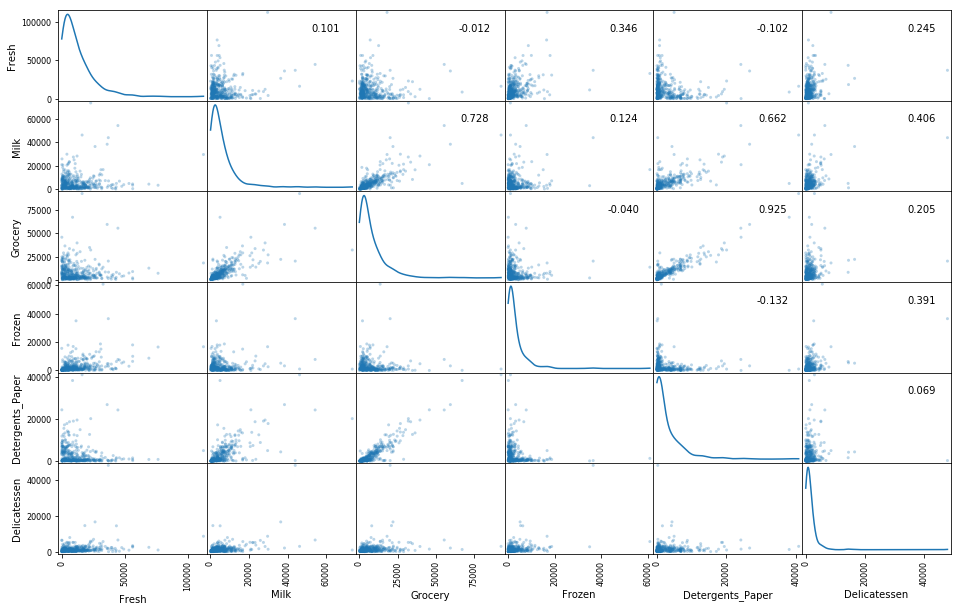

In [5]:
# Produce a scatter matrix for each pair of features in the data
#pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,10), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Milk and Grocery is one pair that show some correlation. So does Detergents_Paper and Grocery.

The matrix for Delicatessen - almost no correlation with all others. The data points are all concentrated along the X-axis. This confirms the inability of the regressor to predict Delicatessen as a function of the other features.

In the scatter matrix, I have plotted the correlation also. The following pairs are highly correlated (>0.50)

Milk-Grocery; Milk-D_P; Grocery-D_P; 
Fresh, Frozen and Deli aren't well correlated with any other features. 

Regarding data distribution of each feature -- Below, the boxplots for the data are plotted. It can be seen that for all features, the median is closer to the first quartile and the tail of the distribution is longer on the right side than left. Hence it can be concluded that the data is skewed right. The histograms in the diagonal of the scatter plot above also infers the same conclusion.

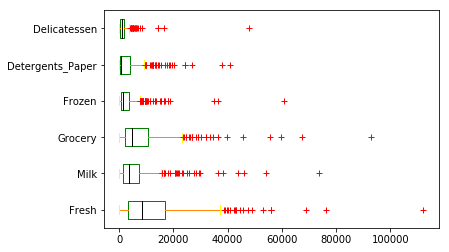

In [6]:
color = dict(boxes='Green', whiskers='DarkOrange', medians='Black', caps='Yellow')
data.plot.box(color=color, sym='r+', vert=False)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

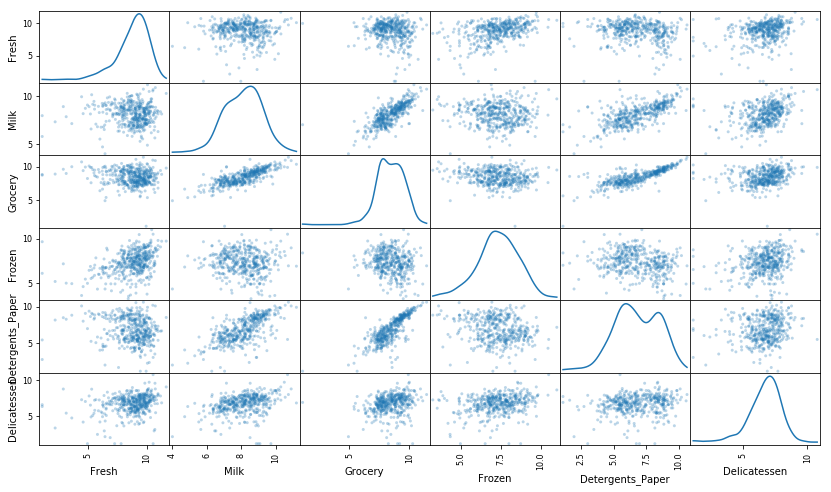

In [7]:
from scipy import stats
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
2,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
import collections
dupCnt = collections.Counter()
outlierIndices = []
concatFrList = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    print "Q1={}".format(Q1)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    print "Q3={}".format(Q3)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    print "step={}".format(step)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    concatFrList.append(list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values))

print concatFrList
tempList = []
for featList in concatFrList:
    for x in featList:
        tempList.append(x)
print "Number of possible outliers", len(tempList)
print collections.Counter(tempList).most_common()
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
display(good_data.describe()) # just to confirm nothing has changed

Q1=8.04805870221
Q3=9.73706394795
step=2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Q1=7.33498124004
Q3=8.88048008859
step=2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Q1=7.67461620137
Q3=9.27385367724
step=2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Q1=6.60967774917
Q3=8.17589608318
step=2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Q1=5.54810142479
Q3=8.27434059875
step=4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Q1=6.01187465693
Q3=7.50672842655
step=2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412], [86, 98, 154, 356], [75, 154], [38, 57, 65, 145, 175, 264, 325, 420, 429, 439], [75, 161], [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]
Number of possible outliers 48
[(154, 3), (128, 2), (65, 2), (66, 2), (75, 2), (193, 1), (264, 1), (137, 1), (142, 1), (145, 1), (412, 1), (285, 1), (161, 1), (420, 1), (38, 1), (171, 1), (429, 1), (175, 1), (304, 1), (305, 1), (439, 1), (184, 1), (57, 1), (187, 1), (203, 1), (325, 1), (289, 1), (81, 1), (338, 1), (86, 1), (343, 1), (218, 1), (95, 1), (96, 1), (353, 1), (98, 1), (355, 1), (356, 1), (357, 1), (233, 1), (109, 1), (183, 1)]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

I used the collections.Counter feature and here are the data points that are considered outliers for more than one feature-- #154 (3x), #128, #65, #66 and #75 (2x). There are several more for one feature only. Since there are six features, I wasn't comfortable to remove all these; So I plan to increase step size by 1.9x instead of 1.5x of IQR and arrive at list of 'outliers'.


In [10]:
# For each feature find the data points with extreme high or low values
import collections
dupCnt = collections.Counter()
outlierIndices = []
concatFrList = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    print "Q1={}".format(Q1)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    print "Q3={}".format(Q3)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.9
    print "step={}".format(step)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    concatFrList.append(list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values))

print concatFrList
tempList = []
for featList in concatFrList:
    for x in featList:
        tempList.append(x)
print collections.Counter(tempList).most_common()
# OPTIONAL: Select the indices for data points you wish to remove
outliers = tempList
print "Number of outliers", len(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
display(good_data.describe()) # just to confirm reduced size

Q1=8.04805870221
Q3=9.73706394795
step=3.2091099669
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
353,4.762174,8.742574,9.961898,5.429346,9.069007,7.013016
357,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480
412,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134


Q1=7.33498124004
Q3=8.88048008859
step=2.93644781224
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.43294,4.007333,4.919981,4.317488,1.94591,2.079442


Q1=7.67461620137
Q3=9.27385367724
step=3.03855120414
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Q1=6.60967774917
Q3=8.17589608318
step=2.97581483461
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Q1=5.54810142479
Q3=8.27434059875
step=5.17985443052
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Q1=6.01187465693
Q3=7.50672842655
step=2.84022216227
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910
285,10.602965,6.461468,8.188689,6.948897,6.077642,2.890372


[[65, 66, 95, 96, 218, 338, 353, 357, 412], [154], [75], [38, 65, 420], [], [109, 128, 142, 154, 183, 184, 187, 203, 233, 285, 289]]
[(154, 2), (65, 2), (128, 1), (142, 1), (412, 1), (285, 1), (289, 1), (420, 1), (38, 1), (183, 1), (184, 1), (187, 1), (66, 1), (75, 1), (203, 1), (338, 1), (218, 1), (95, 1), (96, 1), (353, 1), (357, 1), (233, 1), (109, 1)]
Number of outliers 25


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,8.870789,8.131142,8.437300,7.365533,6.804749,6.783186
std,1.196590,1.047681,1.042657,1.205377,1.668218,1.069507
min,5.081404,4.718499,5.384495,3.637586,1.098612,3.583519
25%,8.149891,7.378384,7.662938,6.683361,5.572154,6.098074
50%,9.071997,8.198089,8.446127,7.406103,6.698268,6.902743
75%,9.737197,8.868976,9.256365,8.182000,8.271037,7.516433
max,11.627601,11.205013,11.437986,11.016479,10.617099,9.712509


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

cumsum for explained variance [ 0.49563859  0.72976652  0.83341134  0.93287023  0.97862931  1.        ]


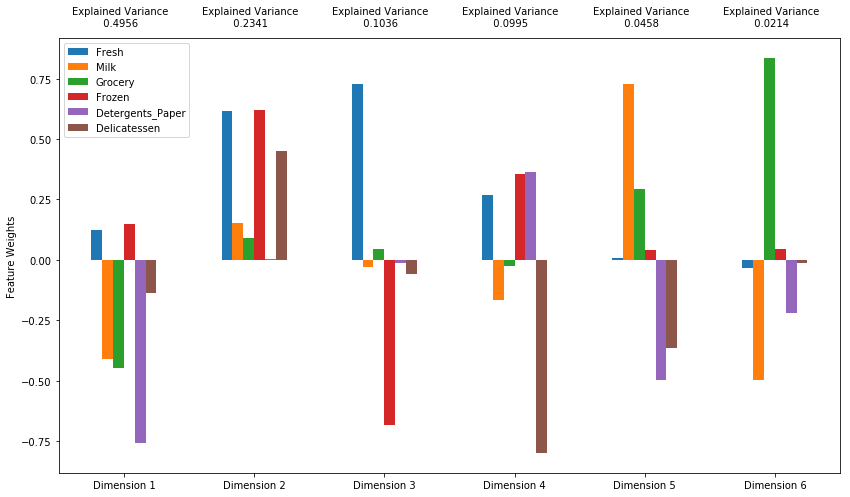

In [11]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

#print "Var expl by 1st two", pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]
#print "Var expl by 1st four", pca.explained_variance_ratio_[0]\
#+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]+pca.explained_variance_ratio_[3]
print "cumsum for explained variance", np.cumsum(pca.explained_variance_ratio_)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
0.7298 is the variance explained by the first two PCs put together. 
0.9329 is the variance explained by the first four PCs put together. 
And it is 1.0 for all six PCs put together, obviously!

D1 represents customer spending on Milk, Grocery and Det_paper.

D2 represents customer spending on the remaining three namely Fresh, Frozen and Deli.

D3 represents customer spending on Fresh and Frozen.

D4 represents customer spending mainly on Deli, and partly to Fresh, Frozen and Det_paper.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.4206,4.6463,0.2385,-0.0100,0.4216,-0.3218
1,-5.4357,1.4573,0.8265,-0.0111,0.4474,0.3135
2,-0.6010,5.2767,-1.1695,-2.5889,1.6297,0.2851


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.4206,4.6463
1,-5.4357,1.4573
2,-0.6010,5.2767


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

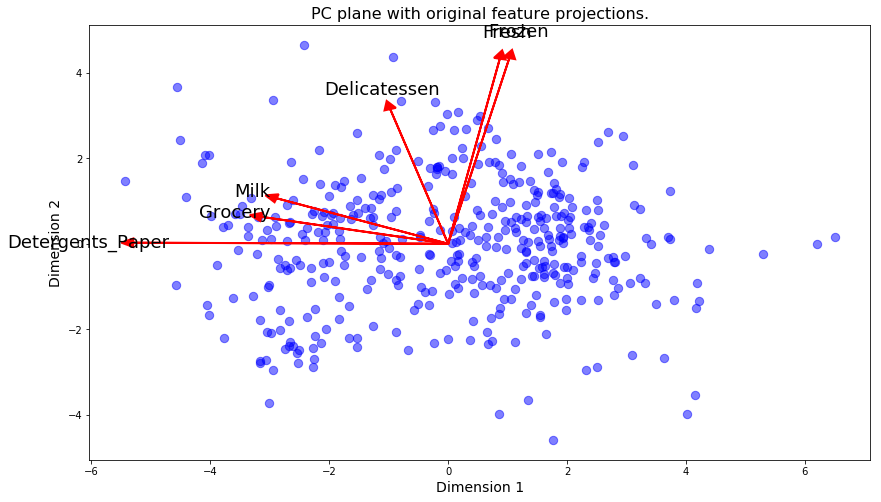

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

My observation: With the 1st component labeled as Dimension1, Milk, Det_p and Grocery, which are "along" the x-axis are strongly correlated.
Wth Dimension2, Fresh, Frozen and Deli are strongly correlated. And Yes, the biplot does agree with the vs.pca_results bar chart.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
Advantage of using K-Means - faster than GMM.

With GMM - soft assignment of datapoints to clusters is the biggest advantage. GMM works with probabilities of a sample belonging to each cluster. As the model iterates, these probabbilities are refined. GMM works better than KMeans on non-linear data. KMeans uses Euclidian distance which can cause unequal weighting of underlying factors, GMM uses  weighted distance.

GMM works well if the data points are distributed in a Gaussian manner. This is as per the doc in sklearn. Below I have plotted the histogram of good_data. It can be seen that all features (except to some extent Det_Paper) exhibit a normal distribution.
Hence I have chosen to go with GMM even though it is slower than KMeans. Given our size of data, GMM should be ok.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
clustererChoice = "GMM"
for i in range(14, 1, -1):
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i, n_init=10, random_state=1).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    #print preds

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "KMeans num clusters=", i, score

    GMMclusterer = GaussianMixture(n_components=i, n_init=10, random_state=1).fit(reduced_data)
    GMMpreds = GMMclusterer.predict(reduced_data)
    GMMcenters = GMMclusterer.means_
    GMMsample_preds = GMMclusterer.predict(pca_samples)
    GMMscore = silhouette_score(reduced_data, GMMpreds)
    print "GMM   num clusters=", i, GMMscore

#Final choice
clusterer = KMeans(n_clusters=2, n_init=10, random_state=1).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)
print "Final choice is KMeans n_components = 2", "score =", score


KMeans num clusters= 14 0.359466142909
GMM   num clusters= 14 0.339565599485
KMeans num clusters= 13 0.363886536115
GMM   num clusters= 13 0.27179478225
KMeans num clusters= 12 0.351387998876
GMM   num clusters= 12 0.307593765034
KMeans num clusters= 11 0.358874273796
GMM   num clusters= 11 0.274152535966
KMeans num clusters= 10 0.366627766606
GMM   num clusters= 10 0.306826901179
KMeans num clusters= 9 0.378377894975
GMM   num clusters= 9 0.335113209215
KMeans num clusters= 8 0.361307627778
GMM   num clusters= 8 0.286831351597
KMeans num clusters= 7 0.371114152363
GMM   num clusters= 7 0.325637423149
KMeans num clusters= 6 0.357580643416
GMM   num clusters= 6 0.240358456265
KMeans num clusters= 5 0.344771887334
GMM   num clusters= 5 0.273169963762
KMeans num clusters= 4 0.324788066196
GMM   num clusters= 4 0.278252147953
KMeans num clusters= 3 0.34770946801
GMM   num clusters= 3 0.299534700889
KMeans num clusters= 2 0.441693704182
GMM   num clusters= 2 0.438679049598
Final choice is K

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Best silhoutte score is for KMeans 2 clusters. score = 0.4417


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

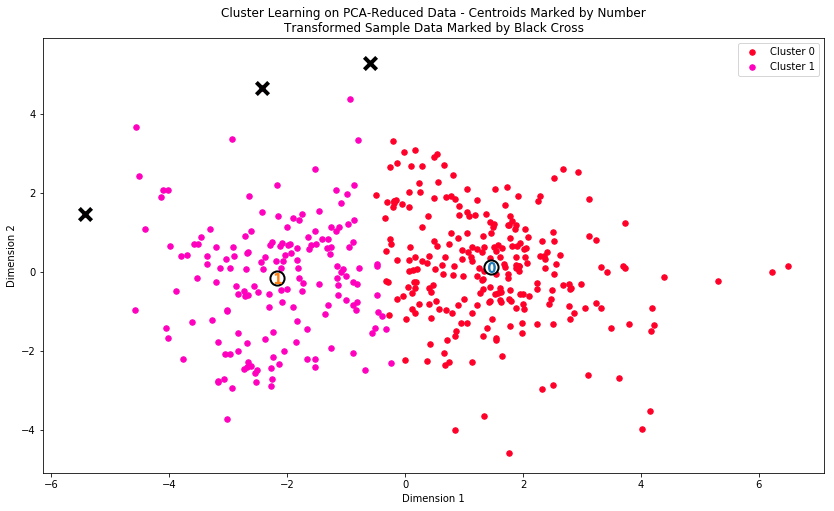

In [17]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)
#vs.cluster_results(reduced_data, GMMpreds, GMMcenters, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9142.0,1898.0,2428.0,2098.0,300.0,758.0
Segment 1,4899.0,8131.0,12080.0,1034.0,4687.0,1109.0


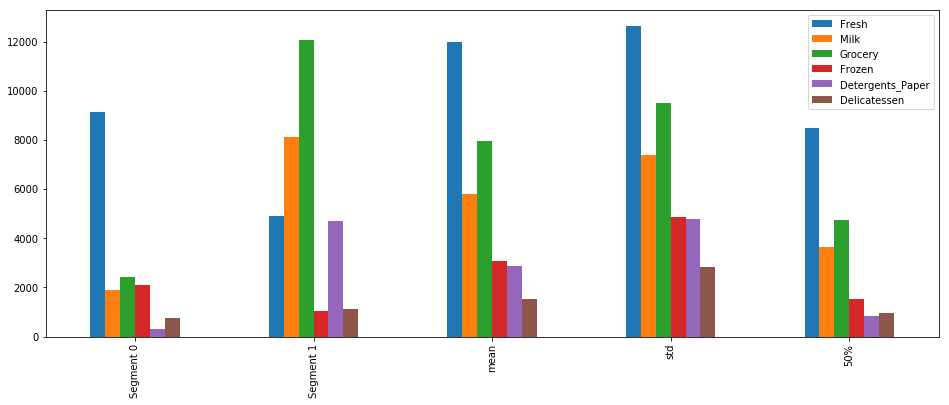

In [42]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
true_centers=true_centers.append(data.describe().loc['mean'])
true_centers=true_centers.append(data.describe().loc['std'])
true_centers=true_centers.append(data.describe().loc['50%'])

true_centers.plot(kind = 'bar', figsize = (16, 6))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Sg0_Fresh ~= Fresh_50%

Sg0_Milk << Milk_Mean < Milk_Median

Sg0_Grocery << Groc_Mean ~= Groc_Median

Sg0_Froz < Froz_Mean < Froz_Med

Sg0_Dp << Dp_Mean < Dp_Med

Sg0_Deli < Deli_Mean < Deli_Med


Sg1_Fresh << Fresh_Mean < Fresh_Median

Sg1_Milk > Milk_Mean ~= Milk_Median

Sg1_Grocery >> Groc_Mean ~= Groc_Median

Sg1_Froz << Froz_Mean < Froz_Med

Sg1_Dp >> Dp_Mean < Dp_Med

Sg1_Deli ~= Deli_Mean and less than Deli_Med

Customers assigned to Segment0 are characterized by focused/combined spending on Fresh, Frozen and Deli. (Eg, restaurants).

Customers assigned to Segment1 are characterized by focused/combined spending on Grocery, Milk and Det_paper. (Eg Retailers)




### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [45]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])

Sample point 0 predicted to be in Cluster 1
The distance between sample point 0 and center of cluster 1:
Fresh               107252.0
Milk                 21496.0
Grocery               6068.0
Frozen               15711.0
Detergents_Paper       261.0
Delicatessen          7441.0
dtype: float64
Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh               11218.0
Milk                38066.0
Grocery             80700.0
Frozen                 -8.0
Detergents_Paper    36140.0
Delicatessen         1835.0
dtype: float64
Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh               27705.0
Milk                42052.0
Grocery             17742.0
Frozen              34436.0
Detergents_Paper      -61.0
Delicatessen        47185.0
dtype: float64


**Answer:**

For Sample 0, Grocery spending is well above center.

I had predicted (in question 1) that the first and second samples are retail stores and that the 3rd sample is a restaurant.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The wholesale distributor can construct an A/B test as follows-
1. Use the customer segments as follows - pick a subset of customers, say 10 from a segment. Construct 5 pairs using these 10; where the pair are very close to each other in the segments. This should be possible using sklearn APIs. Each pair could be at a deterministic distance from the centers. For each pair, apply the 5-day delivery service to one and 3-day service delivery to the other.
2. Figure out a data metric - say it should be a product rating on a 5-star scale. 
3. Run the experiment.
4. Analyze results - did the 3-day deliv service result in lower star rating than the 5-day? If no, then the cost savings on the 3-day service is justifiable.
5. Repeat the above for the other segment too, because the change in deliv service may not effect all customers equally.

To create the pairs of customers for experiments, one could perhaps cluster the unlabeled data into 3 clusters instead of two, and run the A/B test.

 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
A DecisionTreeClassifier can be built using the customers.csv with one added column namely "Segment" which takes the value 0 or 1. This "Segment" is the targer variable.
Then, when the new customers come in, the DecisionTreeClassifier model can be run to predict whether they are retail type or they are restaurant type.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

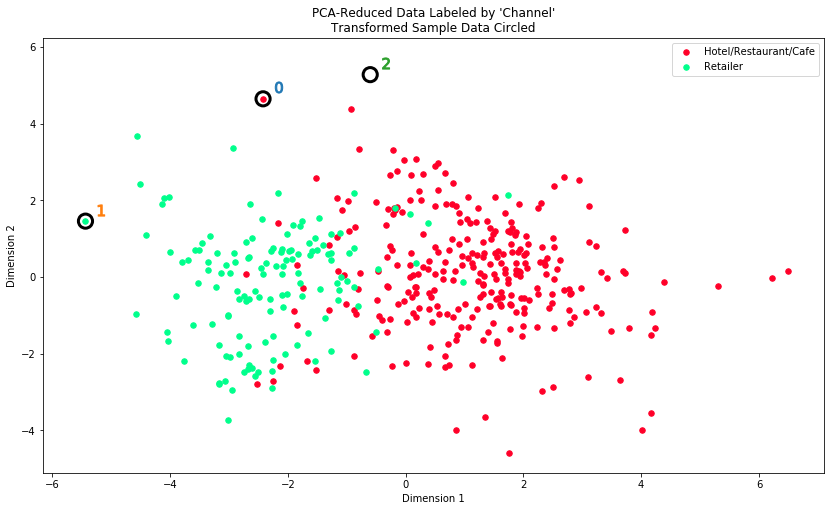

In [20]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
From the viz for "underlying distributions" it can be seen that there is a left-right distribution of retail-horeca. This is quite similar to the what the clustering model has inferred. There are a bunch of data points that are actually horeca but predicted to be retailers by the clustering algorithm - these could be outliers that I chose not to remove.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.